# Laboratorio 3

##### Edgar Mazariegos

#### Parte 1: Numpy: Para los ejercicios siguiente genere el código que considere para resolver el problema que se le plantea.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) ¿Cuál es el tamaño en bytes de un array de 1000 
elementos de tipo booleano?

In [3]:
booleans = np.arange(1, 1001).astype(np.float64)
print(booleans.nbytes)
#Tiene un tamaño de 8000 bytes

8000


2) Cree un array cuyos elementos sean los enteros pares en 
[1,100] y en orden decreciente. Muestre los 10 últimos 
por pantalla.

In [4]:
array = np.arange(0, 101, 2).astype(np.int64)
arrayinvertido=np.flip(array)
print(arrayinvertido [-10:])


[18 16 14 12 10  8  6  4  2  0]


3) Dado el array
2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1
Seleccione con una instrucción el subarray de elementos
0 3 7 4
Después, seleccione el subarray de elementos
2 5
8 5

In [6]:
array2= np.array([[2,4,5,6], [0,3,7,4], [8,8,5,2], [1,5,6,1]])
primera_seleccion= array2[1]
print(primera_seleccion)

fila1 = array2[[0,0],[0,2]]
fila2 = array2[[2,2],[0,2]]
segunda_seleccion = np.array([fila1,fila2])
print(segunda_seleccion)

[0 3 7 4]
[[2 5]
 [8 5]]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], 
obtenga la media aritmética de la diferencia (a-b).


In [10]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
resta_ab=a-b
print(np.mean(resta_ab))

[ 0  1  0 -2]
-0.25


5) Tengo valores de cordenadas (x, y) en las columnas 
del array
1.33 4.5
30.0 10.7
70.2 0.5
Agregue a este array las coordenadas (37.1, -3.6). 
Muestre en pantalla las dimensiones del nuevo 
array.

In [20]:
coordenadas= np.array([[1.33,4.5], [30.0,10.7], [70.2, 0.5]])
coord_fila=np.array([37.1, -3.6])
coord_filaextra = np.append(coordenadas, [coord_fila], axis=0)
print(coord_filaextra)
print(coord_filaextra.shape)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
(4, 2)


6) Copie el array del ejercicio anterior. Traspóngalo (. 
Agregue ahora dos nuevos pares de coordenadas: (10.8, 
3.0) y (35.8, 12.0).

In [33]:
coord_transp=np.transpose(coord_filaextra)
nuevas_coords = np.transpose(np.array([[10.8, 3.0], [35.8, 12.0]]))

coordfinal=np.column_stack((coord_transp,nuevas_coords))



#### Parte 2: Exploración y Minería de Datos: Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [39]:
data=pd.DataFrame(pd.read_csv("NucleosPoblacion.csv"))


1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [48]:
mun100k=data.loc[data['Poblacion'] > 100000, ["Municipio",'Poblacion']]
print(f"{len(mun100k)} municipios tienen más de 100k habitantes")

62 municipios tienen más de 100k habitantes


2) Realice una gráfica de barras sobre la población de cada 
ciudad, ordenela de menor a mayo y responda:
a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de 
las ciudades más pobladas?

a.Según la gráfica, la segunda ciudad más poblada es Madrid
b.Según la gráfica,Granada ocupa la posición 34


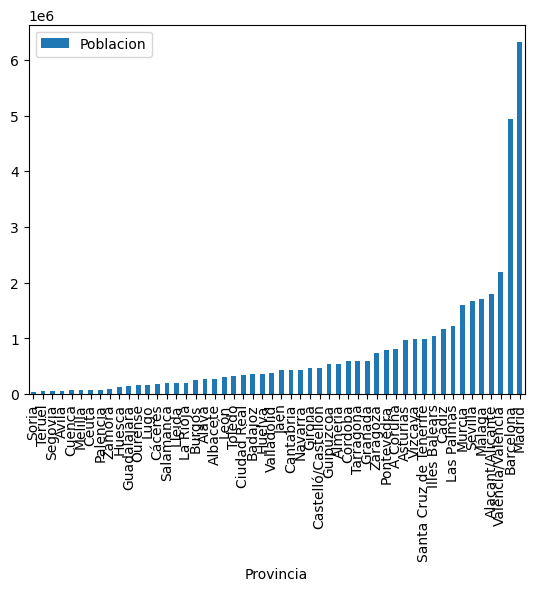

In [107]:
fitro2=pd.DataFrame(data.loc[:,["Provincia","Poblacion"]]).groupby("Provincia").sum().sort_values(by="Poblacion").plot(kind="bar")

print("a.Según la gráfica, la segunda ciudad más poblada es Madrid")
print("b.Según la gráfica,Granada ocupa la posición 34")




3) ¿Cuántos municipios de Extremadura tienen más de 5000 
habitantes?.

In [116]:
filtro3=data[(data["Provincia"].isin(["Badajoz","Cáceres"])) & (data["Poblacion"]>500)]
print(f"Badajoz y Cáceres (provincias de la comunidad de Extremadura) tienen en total {len(filtro3)} municipios")



Badajoz y Cáceres (provincias de la comunidad de Extremadura) tienen en total 14 municipios


4) ¿Cuál es el municipio situado más al Norte? (Usar el  valor de la coordenada "Y" que representa la latitud en  grados). Proporcione también la provincia a la quepertenece y su población.

In [149]:
indice_maximo = data['Y'].idxmax()
filtro4 = pd.DataFrame(data.loc[indice_maximo,["Municipio","Provincia","Poblacion","Y"]])
print(filtro4)

                 104
Municipio    Viveiro
Provincia       Lugo
Poblacion    16211.0
Y          43.625578
El municipio más al sur es Viveiro, de la provincia Lugo, con una población de:16211 y latitud de: 43.625578


5) Obtenga la media, mediana, desviación estándar, valor  máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [165]:
filtro5mediana=pd.DataFrame(data.loc[data["Provincia"]=="Granada",["Provincia","Municipio","Poblacion"]]).groupby("Provincia").median()
filtro5media=pd.DataFrame(data.loc[data["Provincia"]=="Granada",["Provincia","Municipio","Poblacion"]]).groupby("Provincia").mean()
filtro5_Desv_Est=pd.DataFrame(data.loc[data["Provincia"]=="Granada",["Provincia","Municipio","Poblacion"]]).groupby("Provincia").std()
filtro5_max=pd.DataFrame(data.loc[data["Provincia"]=="Granada",["Provincia","Municipio","Poblacion"]]).groupby("Provincia").max()
filtro5_min=pd.DataFrame(data.loc[data["Provincia"]=="Granada",["Provincia","Municipio","Poblacion"]]).groupby("Provincia").min()
print(filtro5mediana,"mediana")
print(filtro5media,"media")
print(filtro5_Desv_Est,"Desviación estándar")
print(filtro5_max,"Valor máximo")
print(filtro5_min,"Valor mínimo")

           Poblacion
Provincia           
Granada      17526.0 mediana
           Poblacion
Provincia           
Granada     30217.85 media
              Poblacion
Provincia              
Granada    50355.491715 Desviación estándar
          Municipio  Poblacion
Provincia                     
Granada    Santa Fe   239154.0 Valor máximo
          Municipio  Poblacion
Provincia                     
Granada    Albolote    10386.0 Valor mínimo


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

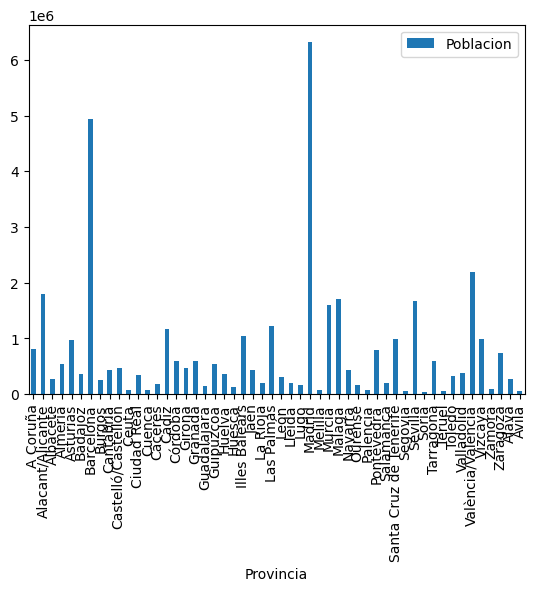

In [178]:
filtro6=pd.DataFrame(data.loc[:,["Municipio","Provincia","Poblacion"]]).groupby("Provincia").sum().plot(kind="bar")

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.